Notebook with the procedure to obtain the linear and non-linear correlation times for all lattice lengths

In [93]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Non-Linear correlation time

In [122]:
nl_8  = np.loadtxt("./Eq/Eq8.txt", dtype=float)
nl_10 = np.loadtxt("./Eq/Eq10.txt", dtype=float)
nl_12 = np.loadtxt("./Eq/Eq12.txt", dtype=float)
nl_14 = np.loadtxt("./Eq/Eq14.txt", dtype=float)
nl_16 = np.loadtxt("./Eq/Eq16.txt", dtype=float)

In [123]:
t = [kk for kk in range(20)]

In [124]:
xp = np.linspace(0, 18, 500)

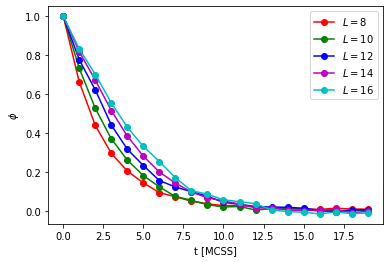

In [125]:
plt.plot(t,nl_8[0:20,0] ,"ro-", #xp,np.exp(0.06)*np.power(xp,-0.3), "r:",
         t,nl_10[0:20,0],"go-", #xp,np.exp(-3.9)*np.power(xp,1.4), "r:",
         t,nl_12[0:20,0],"bo-", #xp,np.exp(-3.9)*np.power(xp,1.4), "r:",
         t,nl_14[0:20,0],"mo-", #xp,np.exp(-3.9)*np.power(xp,1.4), "r:",
         t,nl_16[0:20,0],"co-") #xp,np.exp(-3.9)*np.power(xp,1.4), "r:")
plt.ylabel(r'$\phi$')
plt.xlabel("t [MCSS]")
plt.legend([r'$L=$8',r"$L=$10",r"$L=$12",r"$L=$14",r"$L=$16"])
plt.savefig('./Figures/NonLinear.png', dpi=200, bbox_inches='tight')

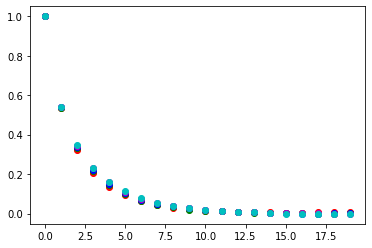

In [126]:
plt.plot(t,nl_8[0:20,1] ,"ro",
         t,nl_10[0:20,1],"go",
         t,nl_12[0:20,1],"bo",
         t,nl_14[0:20,1],"mo",
         t,nl_16[0:20,1],"co")

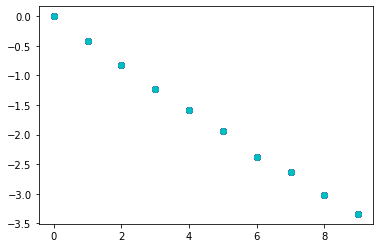

In [8]:
plt.plot(t[0:10],np.log(nl_8[0:10,0]) ,"ro",
         t[0:10],np.log(nl_8[0:10,0]),"go",
         t[0:10],np.log(nl_8[0:10,0]),"bo",
         t[0:10],np.log(nl_8[0:10,0]),"mo",
         t[0:10],np.log(nl_8[0:10,0]),"co")

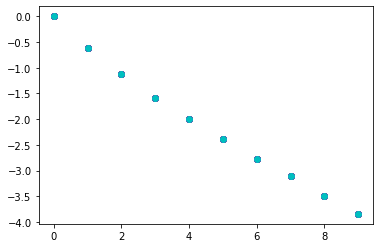

In [9]:
plt.plot(t[0:10],np.log(nl_8[0:10,1]) ,"ro",
         t[0:10],np.log(nl_8[0:10,1]),"go",
         t[0:10],np.log(nl_8[0:10,1]),"bo",
         t[0:10],np.log(nl_8[0:10,1]),"mo",
         t[0:10],np.log(nl_8[0:10,1]),"co")

In [10]:
#Fit for one of the curves, the others are the same
times = sm.add_constant(t[0:10])
model = sm.OLS(np.log(nl_8[0:10,0]),times)
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4280.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           3.32e-12
Time:                        08:59:25   Log-Likelihood:                 16.593
No. Observations:                  10   AIC:                            -29.19
Df Residuals:                       8   BIC:                            -28.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0683      0.030     -2.259      0.054      -0.138       0.001
x1            -0.3707      0.006    -65.421      0.000      -0.384      -0.358
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.409
Skew:                          -0.106   Prob(JB):                        0.815
Kurtosis:                       2.032   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
((1/0.3707 + 1/0.3718)/2)

2.6936086055008674

$\tau\approx3$ for every lattice.

# Linear Correlation Time

In [127]:
import csv
filename = "./Eq/corr_micro.csv"
def read_csv(filename):
    with open(filename, newline='') as f_input:
        return [list(map(float, row)) for row in csv.reader(f_input)]

In [128]:
l_8 = np.array(read_csv("./Eq/corr_micro.csv"))[:,0]
l_10 = np.array(read_csv("./Eq/corr_micro.csv"))[:,1]
l_12 = np.array(read_csv("./Eq/corr_micro.csv"))[:,2]
l_14 = np.array(read_csv("./Eq/corr_micro.csv"))[:,3]
l_16 = np.array(read_csv("./Eq/corr_micro.csv"))[:,4]

In [129]:
t = [kk for kk in range(70)]

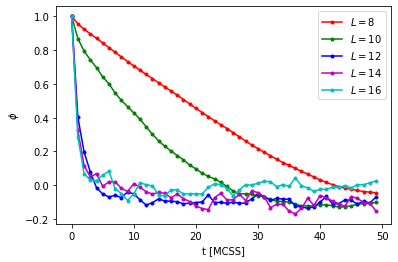

In [133]:
plt.plot(t[0:50],l_8[0:50] ,"ro-",
         t[0:50],l_10[0:50],"go-",
         t[0:50],l_12[0:50],"bo-",
         t[0:50],l_14[0:50],"mo-",
         t[0:50],l_16[0:50],"co-",markersize = 3)
plt.ylabel(r'$\phi$')
plt.xlabel("t [MCSS]")
plt.legend([r'$L=$8',r"$L=$10",r"$L=$12",r"$L=$14",r"$L=$16"])
plt.savefig('./Figures/Linear.png', dpi=200, bbox_inches='tight')

## L = 8

In [71]:
# The y values.  A numpy array is used here,
# but a python list could also be used.
y = l_8[:42]

# Compute the area using the composite trapezoidal rule.
area = np.trapz(y, dx=1)
print("area =", area)

area = 18.818108549598595


## L = 10

In [74]:
# The y values.  A numpy array is used here,
# but a python list could also be used.
y = l_10[:25]

# Compute the area using the composite trapezoidal rule.
area = np.trapz(y, dx=1)
print("area =", area)

area = 9.233693978317966


# L = 12

In [82]:
times = sm.add_constant(t[0:4])
model = sm.OLS(np.log(l_12[0:4]),times)
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     885.5
Date:                Mon, 05 Dec 2022   Prob (F-statistic):            0.00113
Time:                        10:48:29   Log-Likelihood:                 6.7974
No. Observations:                   4   AIC:                            -9.595
Df Residuals:                       2   BIC:                            -10.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0193      0.052     -0.368      0.748      -0.244       0.206
x1            -0.8325      0.028    -29.757      0.001      -0.953      -0.712
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.400
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.309
Skew:                           0.028   Prob(JB):                        0.857
Kurtosis:                       1.640   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# L = 14

In [87]:
times = sm.add_constant(t[0:4])
model = sm.OLS(np.log(l_14[0:4]),times)
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     544.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):            0.00183
Time:                        10:50:41   Log-Likelihood:                 5.0720
No. Observations:                   4   AIC:                            -6.144
Df Residuals:                       2   BIC:                            -7.371
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0628      0.081     -0.780      0.517      -0.409       0.284
x1            -1.0051      0.043    -23.339      0.002      -1.190      -0.820
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.031
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.612
Skew:                          -0.052   Prob(JB):                        0.736
Kurtosis:                       1.086   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## L = 16

In [88]:
times = sm.add_constant(t[0:4])
model = sm.OLS(np.log(l_16[0:4]),times)
result = model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):            0.00606
Time:                        10:51:54   Log-Likelihood:                 2.0110
No. Observations:                   4   AIC:                          -0.02207
Df Residuals:                       2   BIC:                            -1.249
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0773      0.173     -0.446      0.699      -0.822       0.668
x1            -1.1840      0.093    -12.791      0.006      -1.582      -0.786
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.509
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.486
Skew:                          -0.696   Prob(JB):                        0.784
Kurtosis:                       2.010   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""